##Objective:
Supply Demand Gap of Uber Bookings from Two pickup points : Airport and City

## DataSet Descriptions:
#####There are six attributes associated with each request made by a customer:
  



1.   Request id: A unique identifier of the request
2.   Time of request: The date and time at which the customer made the trip request
1.   Drop-off time: The drop-off date and time, in case the trip was completed 
2.   Pick-up point: The point from which the request was made
1.   Driver id: The unique identification number of the driver
2.   Status of the request: The final status of the trip, can be either completed, canceled by the driver or no cars are available









####**Note: For this assignment, only the trips to and from the airport are being considered.**

#### **Connect with google drive**

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Import Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

In [51]:
!ls

datadescription.jpg  drive  sample_data  status_per_request.png


In [52]:
uber_data=pd.read_csv("drive/MyDrive/UberDemand_and_Supply_gap_Assignment/Uber Request Data.csv")
uber_data.shape

(6745, 6)

###**Exploratory Data Analysis**

In [53]:
uber_data.head()



,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [54]:
##Data set info
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [55]:
###Stastical infor of Data set
uber_data.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [56]:
###Check Duplicate Request id 
req_ids = uber_data[['Request id']]
is_duplicate = req_ids.duplicated()
sum(is_duplicate)

0

It's means that there is no duplicate Request id.

In [57]:
##Missing Data check
uber_data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In data set , missing of Driver id column and Drop timestamp column are 2650 and 3914.

In [58]:
###Check the status as par request
statuscount=uber_data[["Request id","Status"]].groupby("Status").count()
statuscount

,Request id
Status,
Cancelled,1264
No Cars Available,2650
Trip Completed,2831


####  "Driver id" column has 2650 missing as shown above but this is equal to the "No cars Available" trip status, hence there are no missing values "Drop Timestamp" columns has 3914 missing values which is the sum of "No cars Available" and "Cancelled" (2650+1264=3914)

###**Therefore, there is no missing values in the data set**

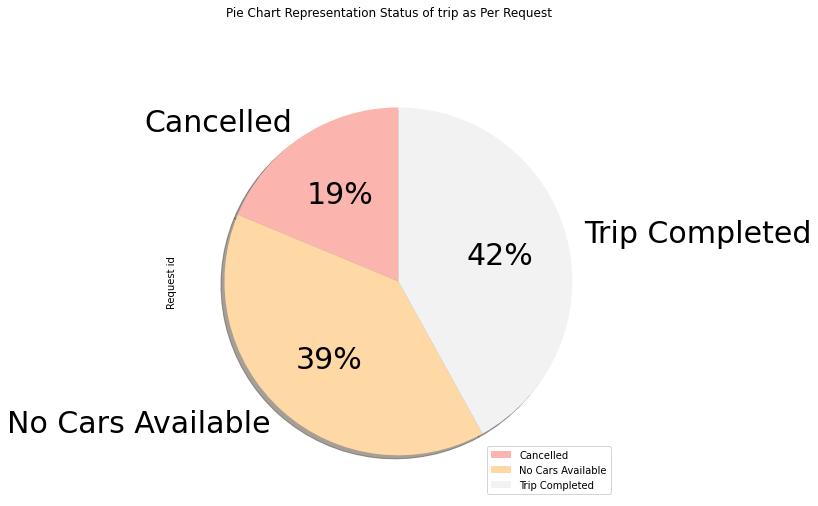

In [59]:
status_per_request=uber_data[["Request id","Status"]].groupby("Status").count().plot(kind="pie",subplots="True",autopct='%1.0f%%', shadow=True, startangle=90, figsize=[10,8],colormap="Pastel1",title="Pie Chart Representation Status of trip as Per Request", fontsize=30)
status_per_request
plt.savefig("status_per_request.png")

##### Above pie chart shows that There is a very big supply demand gap Only 42 percent of the total trip requests are being completed There are a total of 19 percent trips that are being cancelled by the driver There are 39 percent trip requests which are being turned down due to unavailabiltity of cars. 

In [60]:
cross_tab_prop = pd.crosstab(index=uber_data['Pickup point'],
                             columns=uber_data['Status'],
                             normalize="index")
cross_tab_prop

Status,Cancelled,No Cars Available,Trip Completed
Pickup point,,,
Airport,0.061149,0.52903,0.409821
City,0.303964,0.26718,0.428857


In [61]:
cross_tab = pd.crosstab(index=uber_data['Pickup point'],
                        columns=uber_data['Status'])
cross_tab

Status,Cancelled,No Cars Available,Trip Completed
Pickup point,,,
Airport,198,1713,1327
City,1066,937,1504


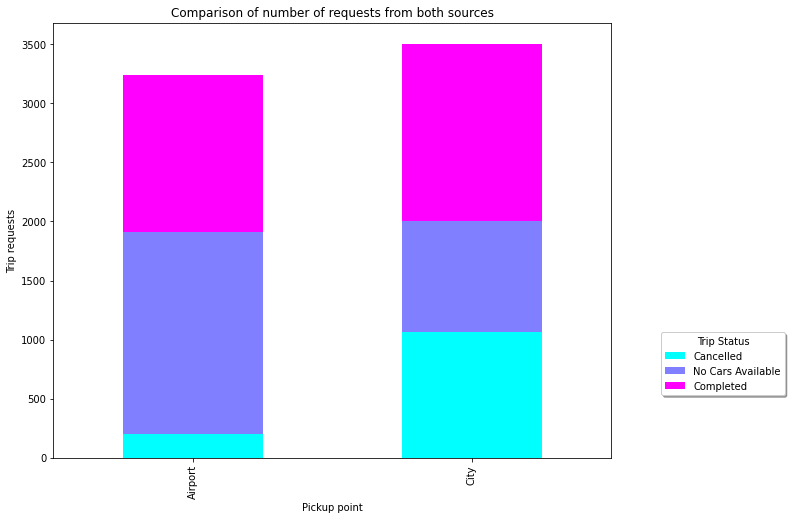

In [62]:
from pandas.core.reshape.pivot import crosstab
## checking where request is coming from , Airport or city. Trip Status: Airpot to City and City to Aiport
reqfrom=uber_data[["Request id","Status","Pickup point"]].groupby(["Pickup point","Status"]).count()

reqfrom.unstack().plot(kind='bar', stacked=True, figsize=[10,8],colormap="cool")
plt.xlabel("Pickup point")
plt.ylabel("Trip requests")
plt.title("Comparison of number of requests from both sources")
plt.legend(title='Trip Status',loc='upper center', bbox_to_anchor=(1.2, 0.3), shadow=True, ncol=1, labels=['Cancelled', 'No Cars Available', 'Completed'])

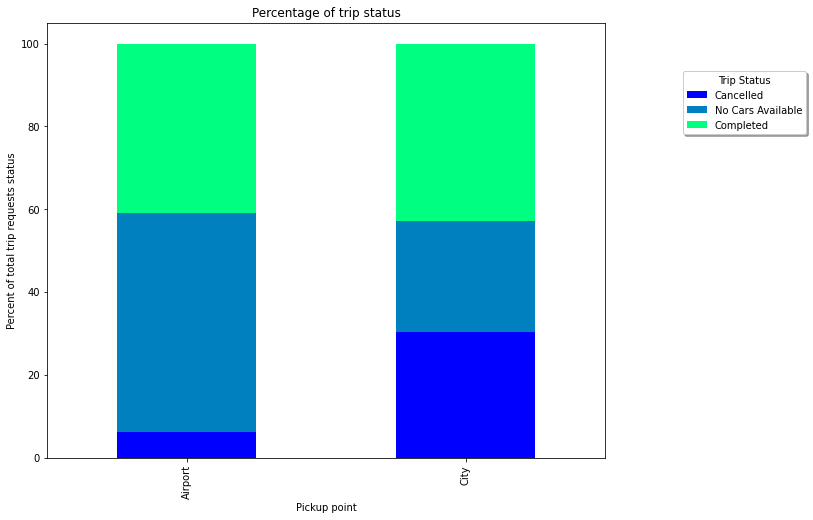

In [63]:
### Visulaizing the pick up request in format of percentage
percentgap=reqfrom.unstack()
percentgap["Cancel%"]=percentgap["Request id"]["Cancelled"]/percentgap.iloc[0:,:3].sum(axis=1)*100
percentgap["NoCarsAvailable%"]=percentgap["Request id"]["No Cars Available"]/percentgap.iloc[0:,:3].sum(axis=1)*100
percentgap["TripCompleted%"]=percentgap["Request id"]["Trip Completed"]/percentgap.iloc[0:,:3].sum(axis=1)*100

percentgap.iloc[0:,3:].plot(kind='bar', stacked=True, figsize=[10,8],colormap="winter")
plt.xlabel("Pickup point")
plt.ylabel("Percent of total trip requests status")
plt.title("Percentage of trip status")
plt.legend(title='Trip Status', loc='upper center', bbox_to_anchor=(1.25, 0.9), shadow=True, ncol=1, labels=['Cancelled', 'No Cars Available', 'Completed'])

####More problematic Pickup point is Airport with 59% (53%- non availability of cars and 6%- cancellations) supply demand gap City has 57 % (27%- non availability of cars and 30%- cancellations)supply demand gap

In [64]:
##Checking format of drop and Request timestamp
uber_data[['Drop timestamp','Request timestamp']]

,Drop timestamp,Request timestamp
0,11/7/2016 13:00,11/7/2016 11:51
1,11/7/2016 18:47,11/7/2016 17:57
2,12/7/2016 9:58,12/7/2016 9:17
3,12/7/2016 22:03,12/7/2016 21:08
4,13-07-2016 09:25:47,13-07-2016 08:33:16
...,...,...
6740,NaN,15-07-2016 23:49:03
6741,NaN,15-07-2016 23:50:05
6742,NaN,15-07-2016 23:52:06
6743,NaN,15-07-2016 23:54:39


#### Here we can see Drop timestamp and request timestamp in different datatypes. so that we have to correct timestamp of request and drop for further analysis

In [65]:
#Correcting the data types
uber_data['Request timestamp'] = pd.to_datetime(uber_data['Request timestamp'])
uber_data['Drop timestamp'] = pd.to_datetime(uber_data['Drop timestamp'])

uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [66]:
###Check updated data type of Request timestamp and Drop Time stamp
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


##### Here we can see data type of Request Timestamp and drop timestamp is datetime. But earlier it's object type.

In [67]:
#Extracting pick-up and drop date, time, day, hour for further analysis
uber_data['pick_date'] = uber_data['Request timestamp'].dt.date
uber_data['pick_day'] =uber_data['Request timestamp'].dt.day
uber_data['pick_hour'] = uber_data['Request timestamp'].dt.hour
uber_data['pick_day_week'] = uber_data['Request timestamp'].apply(lambda x: datetime.datetime.strftime(x, '%A'))


uber_data['drop_date'] = uber_data['Drop timestamp'].dt.date
uber_data['drop_day'] = uber_data['Drop timestamp'].dt.day
uber_data['drop_hour'] = uber_data['Drop timestamp'].dt.hour
uber_data['drop_day_week'] = uber_data['Request timestamp'].apply(lambda x: datetime.datetime.strftime(x, '%A'))
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,pick_date,pick_day,pick_hour,pick_day_week,drop_date,drop_day,drop_hour,drop_day_week
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,7,11,Monday,2016-11-07,7.0,13.0,Monday
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,7,17,Monday,2016-11-07,7.0,18.0,Monday
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,7,9,Wednesday,2016-12-07,7.0,9.0,Wednesday
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,7,21,Wednesday,2016-12-07,7.0,22.0,Wednesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,13,8,Wednesday,2016-07-13,13.0,9.0,Wednesday


In [68]:
### Checking unique pick date and drop date time
print(uber_data['pick_date'].unique())
print("\n")
print(uber_data['drop_date'].unique())

[datetime.date(2016, 11, 7) datetime.date(2016, 12, 7)
 datetime.date(2016, 7, 13) datetime.date(2016, 7, 14)
 datetime.date(2016, 7, 15)]


[datetime.date(2016, 11, 7) datetime.date(2016, 12, 7)
 datetime.date(2016, 7, 13) datetime.date(2016, 7, 14)
 datetime.date(2016, 7, 15) datetime.date(2016, 7, 16) NaT]


In [69]:
uber_data['drop_date'].value_counts()

2016-11-07    582
2016-07-13    569
2016-12-07    568
2016-07-15    546
2016-07-14    536
2016-07-16     30
Name: drop_date, dtype: int64

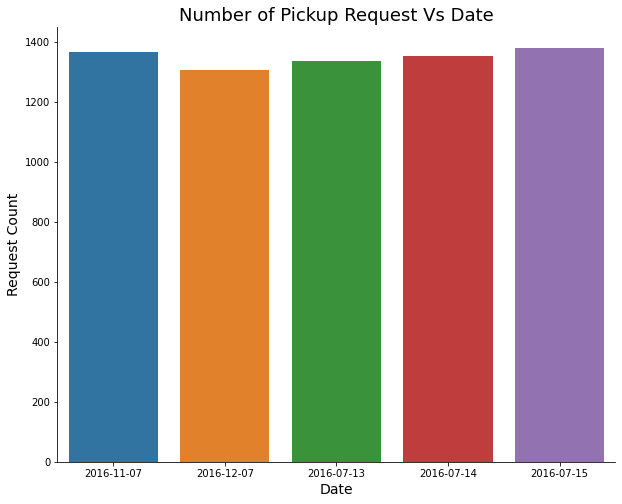

In [70]:
#Plotting cab sequests by day
plt.figure(figsize=(10,8))
sns.countplot(x='pick_date', data=uber_data)
sns.despine()
plt.title("Number of Pickup Request Vs Date", fontsize = 18)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Request Count", fontsize = 14)
plt.show()

####**The requests seems to be equally distributed across the days except 2016-07-16**

<Figure size 1080x720 with 0 Axes>

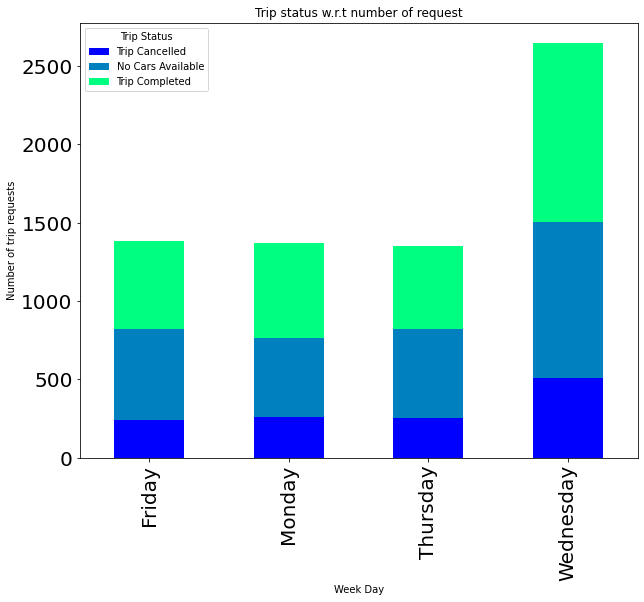

In [71]:
### Status of trip per day w.r.t number of request
tripday=uber_data[["Request id","Status","pick_day_week"]].groupby(["pick_day_week","Status"]).count().unstack()
plt.figure(figsize=(15,10))
tripday.plot(kind='bar', stacked=True, figsize=[10,8], legend=True,colormap="winter",fontsize=20)
plt.xlabel("Week Day")
plt.ylabel("Number of trip requests")
plt.title("Trip status w.r.t number of request")
plt.legend(title='Trip Status', loc='upper left', labels=['Trip Cancelled', 'No Cars Available', 'Trip Completed'])
plt.show()

<Figure size 1296x720 with 0 Axes>

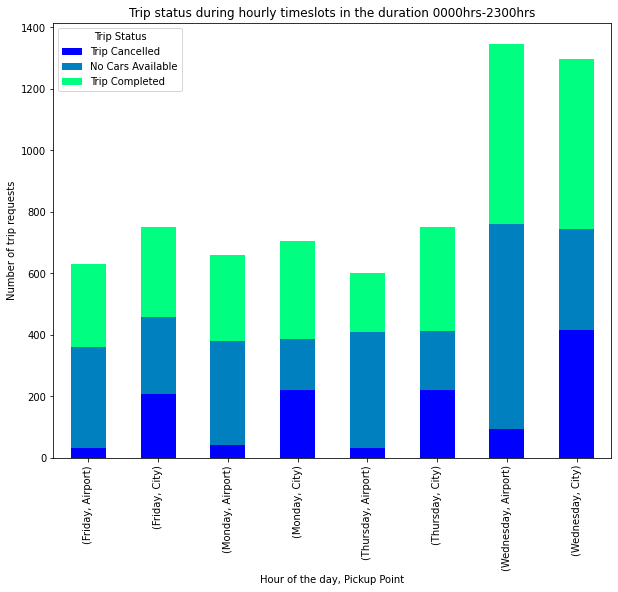

In [72]:
####Days of the week: Comparing both Pickup Points
timeslots=uber_data[["Request id","Status","pick_day_week","Pickup point"]].groupby(["pick_day_week","Pickup point","Status"]).count()
plt.figure(figsize=(18,10))
timeslots.unstack().plot(kind='bar', stacked=True, figsize=[10,8], legend=True,colormap="winter")
plt.xlabel("Hour of the day, Pickup Point")
plt.ylabel("Number of trip requests")
plt.title("Trip status during hourly timeslots in the duration 0000hrs-2300hrs")
plt.legend(title='Trip Status', loc='upper left', labels=['Trip Cancelled', 'No Cars Available', 'Trip Completed'])
plt.show()

####We will look into the requests on hourly basis.

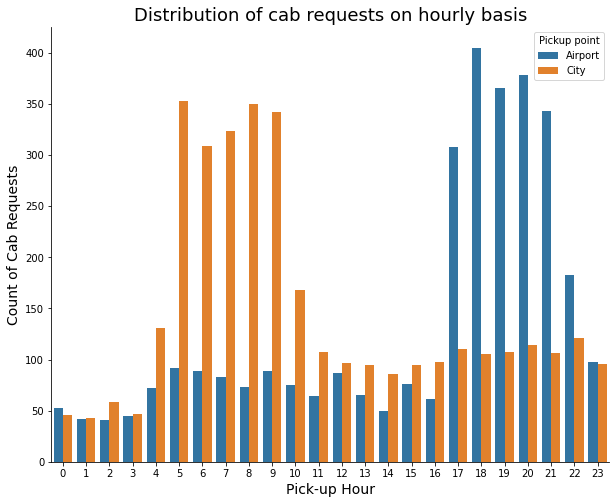

In [73]:
#Plot count plot for all days w.r.t. to pick up hour
plt.figure(figsize=(10, 8))
sns.countplot(x = "pick_hour", hue = "Pickup point", data = uber_data)
sns.despine()
plt.title("Distribution of cab requests on hourly basis", fontsize = 18)
plt.xlabel("Pick-up Hour", fontsize = 14)
plt.ylabel("Count of Cab Requests", fontsize = 14)
plt.show()



*  There is a surge in the number of requests at night (5-9 PM) at the airport.

*   There is a surge in the number of requests in the morning (5-9 AM) in the city.



<Figure size 1296x720 with 0 Axes>

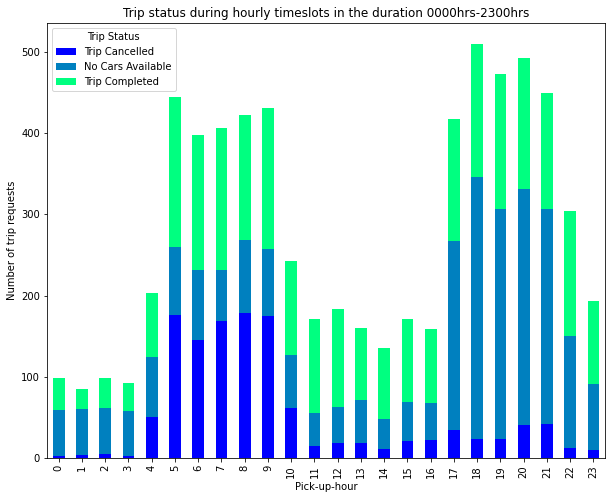

In [74]:
timeslots=uber_data[["Request id","Status","pick_hour"]].groupby(["pick_hour","Status"]).count()
plt.figure(figsize=(18,10))
timeslots.unstack().plot(kind='bar', stacked=True, figsize=[10,8], legend=True,colormap="winter")
plt.xlabel("Pick-up-hour")
plt.ylabel("Number of trip requests")
plt.title("Trip status during hourly timeslots in the duration 0000hrs-2300hrs")
plt.legend(title='Trip Status', loc='upper left', labels=['Trip Cancelled', 'No Cars Available', 'Trip Completed'])
plt.show()



*   There is surge number of trip completed and trip cancelled as per request in the morning(5-9AM).
*   There is surge number of car unaviability  per request at night(5-9PM).



###**Comparison Chart of pickup point on hour basis w.r.t number of request**

<Figure size 1080x720 with 0 Axes>

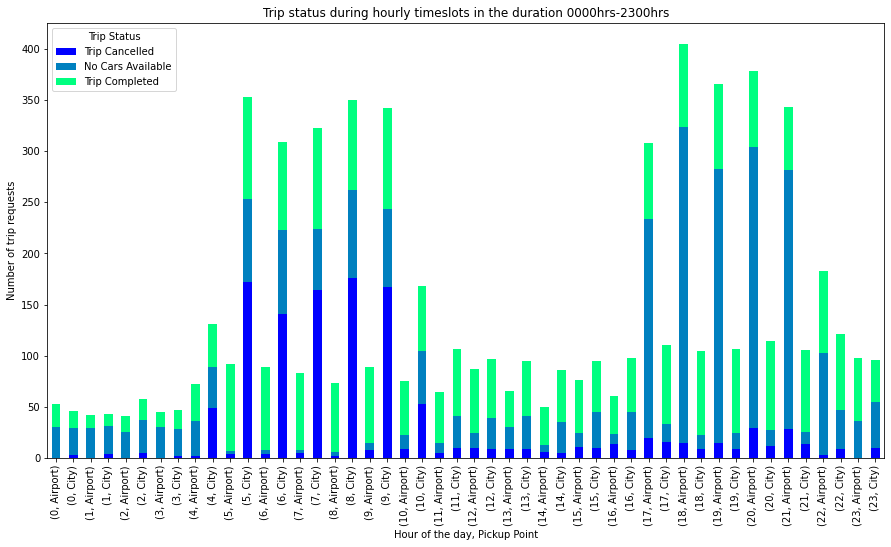

In [75]:
timeslots=uber_data[["Request id","Status","pick_hour","Pickup point"]].groupby(["pick_hour","Pickup point","Status"]).count()
plt.figure(figsize=(15,10))
timeslots.unstack().plot(kind='bar', stacked=True, figsize=[15,8], legend=True,colormap="winter")
plt.xlabel("Hour of the day, Pickup Point")
plt.ylabel("Number of trip requests")
plt.title("Trip status during hourly timeslots in the duration 0000hrs-2300hrs")
plt.legend(title='Trip Status', loc='upper left', labels=['Trip Cancelled', 'No Cars Available', 'Trip Completed'])
plt.show()


Here we can see that

*   There is surge number of trip completed and trip cancelled as per request in the morning(5-9AM) from pick up point city.
*   There is large number of car unavailable at pick up point Airport at night(5-9PM)



###Let's divide the hours in slots for various time period of the day
    

*   2am - 5am: Pre_Morning
*   5am - 10am: Morning_Rush

*   10am - 5pm: Day_Time
*  5pm - 10pm: Evening_Rush

*  10pm - 2am: Late_Night








In [76]:
def time_period(x):
    'divide the time of the day into five categories'
    if 2<= x < 5:
        return "Pre_Morning"
    elif 5 <= x < 10:
        return "Morning_Rush"
    elif 10 <= x < 17:
        return "Day_Time"
    elif 17 <= x < 22:
        return "Evening_Rush"
    else:
        return "Late_Night"

uber_data['time_slot'] = uber_data.pick_hour.apply(lambda x: time_period(x))

uber_data.time_slot.value_counts()

Evening_Rush    2342
Morning_Rush    2103
Day_Time        1224
Late_Night       682
Pre_Morning      394
Name: time_slot, dtype: int64

In [77]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,pick_date,pick_day,pick_hour,pick_day_week,drop_date,drop_day,drop_hour,drop_day_week,time_slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,2016-11-07,7,11,Monday,2016-11-07,7.0,13.0,Monday,Day_Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,2016-11-07,7,17,Monday,2016-11-07,7.0,18.0,Monday,Evening_Rush
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,2016-12-07,7,9,Wednesday,2016-12-07,7.0,9.0,Wednesday,Morning_Rush
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,2016-12-07,7,21,Wednesday,2016-12-07,7.0,22.0,Wednesday,Evening_Rush
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,13,8,Wednesday,2016-07-13,13.0,9.0,Wednesday,Morning_Rush


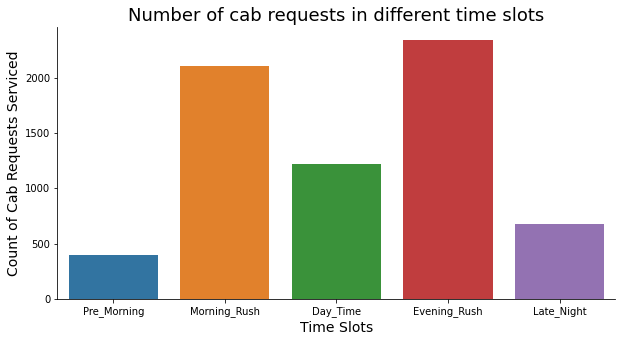

In [78]:
#Plot requests w.r.t. status for different time slots
plt.figure(figsize=(10, 5))
sns.countplot(x = "time_slot", data = uber_data, 
              order= ['Pre_Morning', 'Morning_Rush', "Day_Time", "Evening_Rush", "Late_Night"])
sns.despine()
plt.title("Number of cab requests in different time slots", fontsize = 18)
plt.xlabel("Time Slots", fontsize = 14)
plt.ylabel("Count of Cab Requests Serviced", fontsize = 14)
plt.show()

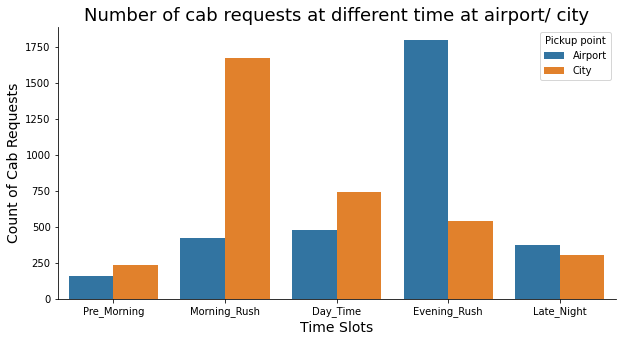

In [79]:
#Plot requests w.r.t. status for different time slots at airport/city
plt.figure(figsize=(10, 5))
sns.countplot(x = "time_slot", data = uber_data, hue = 'Pickup point',
              order= ['Pre_Morning', 'Morning_Rush', "Day_Time", "Evening_Rush", "Late_Night"])
sns.despine()
plt.title("Number of cab requests at different time at airport/ city", fontsize = 18)
plt.xlabel("Time Slots", fontsize = 14)
plt.ylabel("Count of Cab Requests", fontsize = 14)
plt.show()

#####The morning rush is due to the cab requests in the city and the evening rush is due to cab requests at the airport.

<Figure size 1296x720 with 0 Axes>

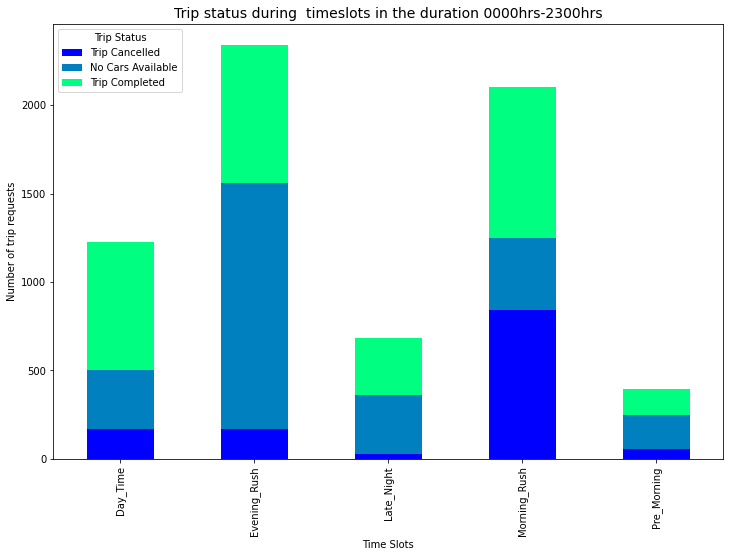

In [80]:
timeslots=uber_data[["Request id","Status","time_slot"]].groupby(["time_slot","Status"]).count()
plt.figure(figsize=(18,10))
timeslots.unstack().plot(kind='bar', stacked=True, figsize=[12,8], legend=True,colormap="winter")
plt.xlabel("Time Slots")
plt.ylabel("Number of trip requests")
plt.title("Trip status during  timeslots in the duration 0000hrs-2300hrs",fontsize=14)
plt.legend(title='Trip Status', loc='upper left', labels=['Trip Cancelled', 'No Cars Available', 'Trip Completed'])
plt.show()

A large number of requests are denied in the morning.

By comparing both the graphs, it can be suggested that the less number of cabs are going to the airport from city and thus very less number of cabs are available at the airport in the evening.

#Understanding the supply-demand gap
####Demand: Total number of requests for cab rides Supply: Total number of requests completed

We will look at the difference between the supply and demand for both the locations.

In [81]:
sd=uber_data[["Request id","Status","pick_hour","Pickup point"]].groupby(["pick_hour","Pickup point","Status"]).count().unstack()
sd

Request id                                 
Status                  Cancelled No Cars Available Trip Completed
pick_hour Pickup point                                            
0         Airport             NaN              30.0           23.0
          City                3.0              26.0           17.0
1         Airport             NaN              29.0           13.0
          City                4.0              27.0           12.0
2         Airport             NaN              25.0           16.0
          City                5.0              32.0           21.0
3         Airport             NaN              30.0           15.0
          City                2.0              26.0           19.0
4         Airport             2.0              34.0           36.0
          City               49.0              40.0           42.0
5         Airport             4.0               3.0           85.0
          City              172.0              81.0          100.0
6         Airport             4.0               4.0           81.0
          City              141.0              82.0           86.0
7         Airport             5.0               3.0           75.0
          City              164.0              60.0           99.0
8         Airport             2.0               4.0           67.0
          City              176.0              86.0           88.0
9         Airport             8.0               7.0           74.0
          City              167.0              76.0           99.0
10        Airport             9.0              13.0           53.0
          City               53.0              52.0           63.0
11        Airport             5.0              10.0           49.0
          City               10.0              31.0           66.0
12        Airport            10.0              14.0           63.0
          City                9.0              30.0           58.0
13        Airport             9.0              21.0           35.0
          City                9.0              32.0           54.0
14        Airport             6.0               7.0           37.0
          City                5.0              30.0           51.0
15        Airport            11.0              13.0           52.0
          City               10.0              35.0           50.0
16        Airport            14.0               9.0           38.0
          City                8.0              37.0           53.0
17        Airport            19.0             215.0           74.0
          City               16.0              17.0           77.0
18        Airport            15.0             309.0           81.0
          City                9.0              13.0           83.0
19        Airport            15.0             268.0           83.0
          City                9.0              15.0           83.0
20        Airport            29.0             275.0           74.0
          City               12.0              15.0           87.0
21        Airport            28.0             254.0           61.0
          City               14.0              11.0           81.0
22        Airport             3.0             100.0           80.0
          City                9.0              38.0           74.0
23        Airport             NaN              36.0           62.0
          City               10.0              45.0           41.0

In [82]:
Morning_Rush=pd.DataFrame(sd.loc[5:10].sum())
Day_Time=pd.DataFrame(sd.loc[10:17].sum())
Evening_Rush=pd.DataFrame(sd.loc[17:22].sum())
Late_night=pd.DataFrame(sd.loc[22:2].sum())
Pre_Morning=pd.DataFrame(sd.loc[2:5].sum())
time_slots=pd.concat([Day_Time,Evening_Rush,Late_night,Morning_Rush,Pre_Morning],axis=1)
time_slots.columns=["Day_Time","Evening_Rush","Late_night","Morning_Rush","Pre_Morning"]

time_slots

Day_Time  Evening_Rush  Late_night  \
           Status                                                  
Request id Cancelled             203.0         178.0         0.0   
           No Cars Available     566.0        1530.0         0.0   
           Trip Completed        873.0         938.0         0.0   

                              Morning_Rush  Pre_Morning  
           Status                                        
Request id Cancelled                 905.0        234.0  
           No Cars Available         471.0        271.0  
           Trip Completed            970.0        334.0

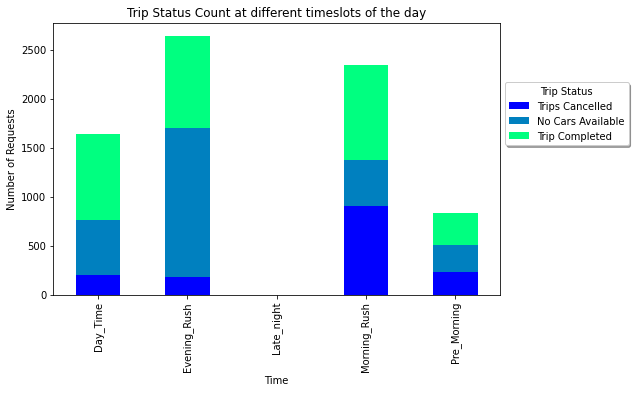

In [83]:
time_slots.reset_index(inplace=True)
time_slots.drop("level_0",axis=1,inplace=True)
time_slots.set_index("Status",inplace=True)
gap=time_slots.T
gap.plot(kind='bar', stacked=True, figsize=[8,5], colormap="winter")
plt.xlabel("Time")
plt.ylabel("Number of Requests")
plt.title("Trip Status Count at different timeslots of the day")
plt.legend(title='Trip Status', labels=['Trips Cancelled', 'No Cars Available', 'Trip Completed'],
        loc='upper center', bbox_to_anchor=(1.15, 0.8), shadow=True, ncol=1)

In [84]:
total=time_slots.sum()
cancel=round((time_slots.loc["Cancelled"]/total)*100)
nocars=round((time_slots.loc["No Cars Available"]/total)*100)
tripcomp=round((time_slots.loc["Trip Completed"]/total)*100)
fail=time_slots.iloc[:2].sum()
failperc=round((fail/total)*100)
supply_dem_gap=pd.concat([gap,pd.DataFrame(columns =["%cancelled", "%NoCarsAvail", "%TripCompleted","%Failed_req",
           "failed requests","total_requests"])])
supply_dem_gap["%cancelled"]=cancel
supply_dem_gap["%NoCarsAvail"]=nocars
supply_dem_gap["%TripCompleted"]=tripcomp
supply_dem_gap["%Failed_req"]=failperc
supply_dem_gap["failed requests"]=fail
supply_dem_gap["total_requests"]=total
supply_dem_gap

,Cancelled,No Cars Available,Trip Completed,%cancelled,%NoCarsAvail,%TripCompleted,%Failed_req,failed requests,total_requests
Day_Time,203.0,566.0,873.0,12.0,34.0,53.0,47.0,769.0,1642.0
Evening_Rush,178.0,1530.0,938.0,7.0,58.0,35.0,65.0,1708.0,2646.0
Late_night,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0
Morning_Rush,905.0,471.0,970.0,39.0,20.0,41.0,59.0,1376.0,2346.0
Pre_Morning,234.0,271.0,334.0,28.0,32.0,40.0,60.0,505.0,839.0


##Demand and supply gap at Airport

In [85]:
n=uber_data[["Request id","Status","pick_hour","Pickup point"]].groupby(["pick_hour","Pickup point","Status"]).count()
citysupdemgap=n.unstack().loc[sd.index.get_level_values("Pickup point")=="City"].reset_index(level="Pickup point", drop=True)
airportsupdemgap=n.unstack().loc[sd.index.get_level_values("Pickup point")=="Airport"].reset_index(level="Pickup point", drop=True)

In [86]:
airport = uber_data[uber_data['Pickup point'] == 'Airport']
airport_analysis = pd.DataFrame(airport.groupby('pick_hour')['Status'].count())
airport_analysis = airport_analysis.rename(columns = {'Status' : 'Demand'})
airport_analysis.head()

,Demand
pick_hour,
0,53
1,42
2,41
3,45
4,72


In [87]:
airport_completion = airport[airport['Status'] == 'Trip Completed']

airport_analysis['Supply'] = pd.DataFrame(airport_completion.groupby('pick_hour')['Status'].count())
airport_analysis.head()

,Demand,Supply
pick_hour,,
0,53,23
1,42,13
2,41,16
3,45,15
4,72,36


<Figure size 1152x576 with 0 Axes>

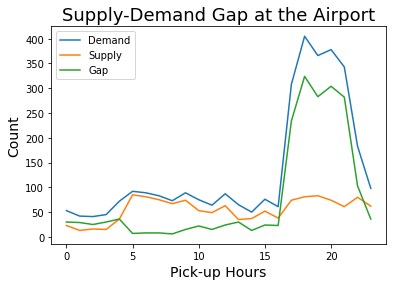

In [88]:
airport_analysis['Gap'] = airport_analysis['Demand'] - airport_analysis['Supply']
plt.figure(figsize=(16, 8))
airport_analysis.plot(kind = 'line')
plt.title("Supply-Demand Gap at the Airport", fontsize = 18)
plt.xlabel("Pick-up Hours", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

##Demand and supply gap at City


In [89]:
city = uber_data[uber_data['Pickup point'] == 'City']
city_analysis = pd.DataFrame(city.groupby('pick_hour')['Status'].count())
city_analysis = city_analysis.rename(columns = {'Status' : 'Demand'})
city_analysis.head()

,Demand
pick_hour,
0,46
1,43
2,58
3,47
4,131


In [90]:
city_completion = city[city['Status'] == 'Trip Completed']

city_analysis['Supply'] = pd.DataFrame(city_completion.groupby('pick_hour')['Status'].count())
city_analysis.head()

,Demand,Supply
pick_hour,,
0,46,17
1,43,12
2,58,21
3,47,19
4,131,42


<Figure size 576x288 with 0 Axes>

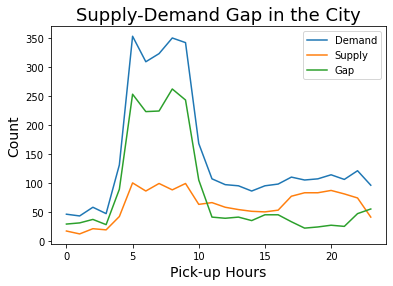

In [91]:
city_analysis['Gap'] = city_analysis['Demand'] - city_analysis['Supply']
plt.figure(figsize=(8, 4))
city_analysis.plot(kind = 'line')
plt.title("Supply-Demand Gap in the City", fontsize = 18)
plt.xlabel("Pick-up Hours", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.show()

### **Data Insight obeservation**

*   Considering timeslots with highest supply demand gaps from airport to city i.e. 5 to 10 pm only 70-80 requests each side are completed from City-Airport and Airport-City, it means the reason "no cars available" is not completely due to half of those cars are in transit but it indicates that all 300 cars are not at service even when there is such a high demand of total approx. 500 requests from both points.
*   Total 300 cars 300 unique driver ids i.e. 300 cars in total and the highest requests at one timeslot from all pickup ponts is as high as 500 recorded at 1800hrs.

*   Airport : Upon analysis, the evening time slot seems to be most problematic for pickup points as airport as the requests are not served due to unavailability of cabs. The unavailability of cabs at the airport in the evening slot may be due to the less number of cabs travelling from city to the airport (less number of request in the city at evening).
*   City : As per the analysis, the morning time slot is most problematic where the requests are being cancelled. Most probably the requests are being cancelled by the drivers the reason being they have to wait for a long time or return empty, as their are few request for cab at the airport in the morning.





##**Recommendations:**


*  Provision of more cars because demand goes as high as 500 at late evenings.
*   Addressing the issue of cars not being at service to customers at all, evident from the fact that only 120-170 requests are completed even when there are total 300 cars existing for service



*  For bridging the demand supply gap from airport to city in evening, more cabs should be present at the airport or cab pooling facility should be started.
*   In morning, Uber can provide return compensation to the driver if had to return empty, this will result in less cancellation of requests by drivers in the morning.

